# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import pickle

training_file = 'train.p'
validation_file = 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_org, y_train_org = train['features'], train['labels']
X_valid_org, y_valid_org = valid['features'], valid['labels']
X_test_org , y_test_org  = test['features'],  test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = X_train_org.shape[0]

# Number of testing examples.
n_test = X_test_org.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train_org.shape[1:3]

# How many unique classes/labels there are in the dataset.
n_classes = max(y_train_org)+1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import pandas as pd
df = pd.read_csv('./signnames.csv')
df

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


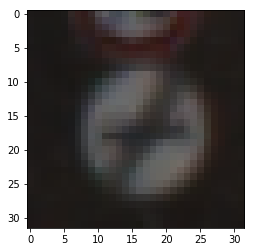

End of no passing, ID: 41


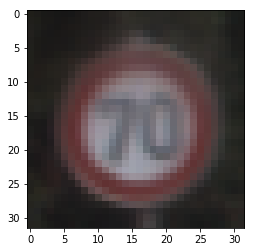

Speed limit (70km/h), ID: 4


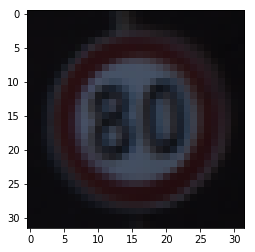

Speed limit (80km/h), ID: 5


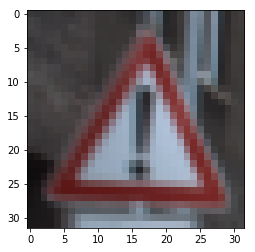

General caution, ID: 18


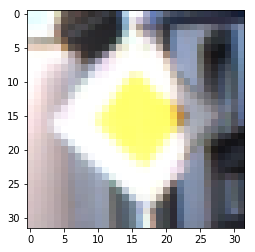

Priority road, ID: 12


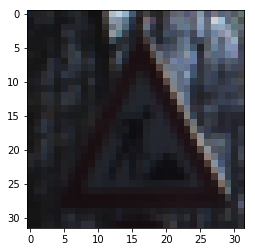

Road work, ID: 25


In [4]:
def visualise_dataset(X_train,y_train):
    for i in range(0,X_train.shape[0],int(X_train.shape[0]/5)):  
        image =  X_train[i,:,:,:]
        fig, ax = plt.subplots()
        ax.imshow(image)
        plt.show()
        sign_id = y_train[i]
        sign_name = df.values[int(sign_id),-1]
        print('{1}, ID: {0}'.format(sign_id,sign_name))
    
visualise_dataset(X_train_org,y_train_org)       

In [5]:
y_train_org[range(0,34799,400)]

array([41, 31, 31, 36, 26, 23,  1,  1,  1,  1,  1, 40, 22, 16,  3,  3,  3,
       19,  4,  4,  4,  4, 11, 11, 11,  0, 27, 24,  9,  9,  9,  5,  5,  5,
        5,  5, 38, 38, 38, 38,  8,  8,  8, 10, 10, 10, 10, 10, 35, 35, 35,
       18, 18, 18,  6, 13, 13, 13, 13, 13,  7,  7,  7, 30, 39, 20, 33, 33,
       28, 12, 12, 12, 12, 12, 14, 15, 15, 17, 17,  2,  2,  2,  2,  2, 25,
       25, 25], dtype=uint8)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
print(X_train_org.shape)
print(X_valid_org.shape)
print(X_test_org.shape)
print(X_train_org[0,0,0,:])

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)
[28 25 24]


In [7]:
import cv2
import numpy as np

def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """

    np.set_printoptions(threshold=np.nan)
    from sklearn.preprocessing import LabelBinarizer
    
    # Turn labels into numbers and apply One-Hot Encoding
    encoder = LabelBinarizer()
    encoder.fit(range(43))
    
    x = encoder.transform(x)
    # Change to float32, so it can be multiplied against the features in TensorFlow, which are float32
    x = x.astype(np.float32)
    
    return x

y_train = one_hot_encode(y_train_org)
y_valid = one_hot_encode(y_valid_org)
y_test  = one_hot_encode(y_test_org)

def conv_to_concat_colorspace(image_batch):
    shape = np.asarray(image_batch.shape)
    shape[-1] = 4
    concat_batch = np.empty(shape)
    for idx in range(image_batch.shape[0]):
        concat_batch[idx,:,:,0:3] = cv2.cvtColor(image_batch[idx], cv2.COLOR_RGB2YCrCb )
        #concat_batch[idx,:,:,3:6] = cv2.cvtColor(image_batch[idx], cv2.COLOR_RGB2YUV )
        #concat_batch[idx,:,:,3] = cv2.cvtColor(image_batch[idx], cv2.COLOR_RGB2HLS)[:,:,2]
        concat_batch[idx,:,:,3] = cv2.cvtColor(image_batch[idx], cv2.COLOR_RGB2HSV)[:,:,1]
        #concat_batch[idx,:,:,5:8] = image_batch[idx]
        concat_batch[idx,:,:,:]   =  concat_batch[idx,:,:,:]/255
    return concat_batch

%time X_train = conv_to_concat_colorspace(X_train_org)
%time X_valid = conv_to_concat_colorspace(X_valid_org)
%time X_test  = conv_to_concat_colorspace(X_test_org)

Wall time: 4.48 s
Wall time: 744 ms
Wall time: 1.86 s


(4410, 32, 32, 4)


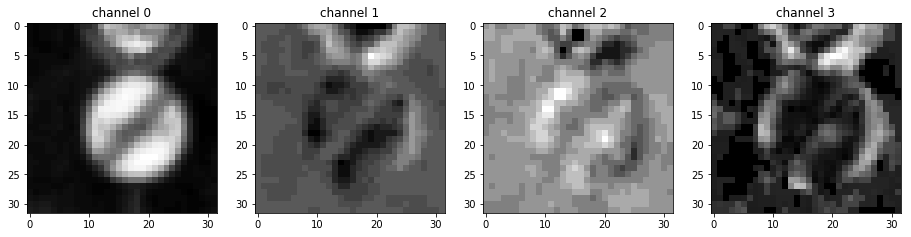

End of no passing, ID: 41


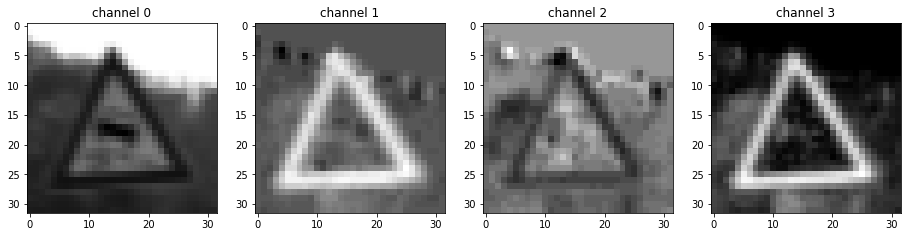

Wild animals crossing, ID: 31


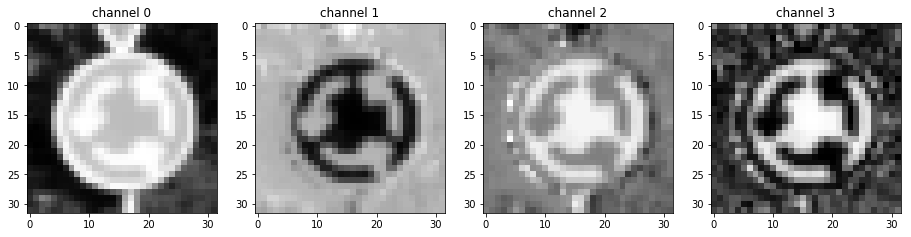

Wild animals crossing, ID: 31


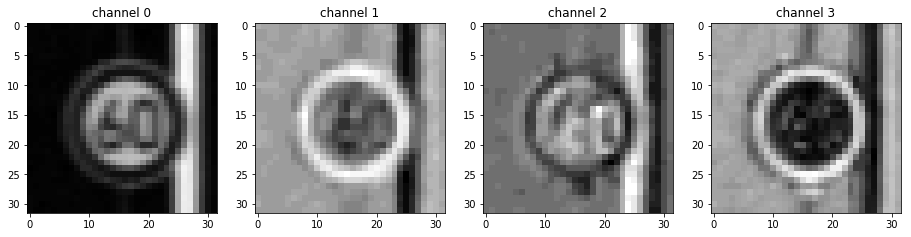

Wild animals crossing, ID: 31


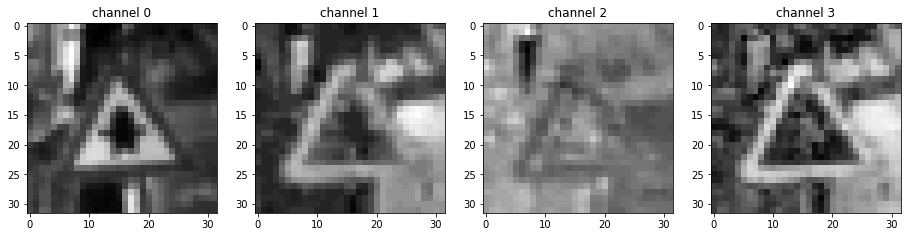

Go straight or right, ID: 36


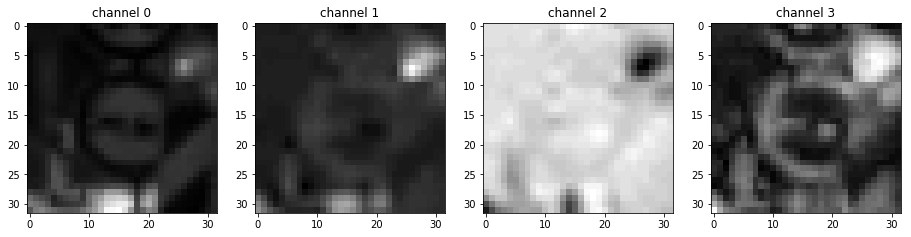

Traffic signals, ID: 26


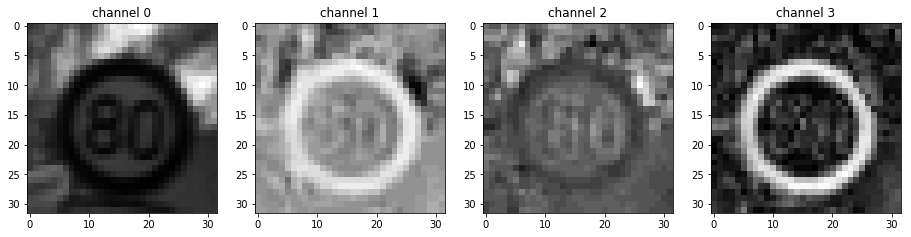

Traffic signals, ID: 26


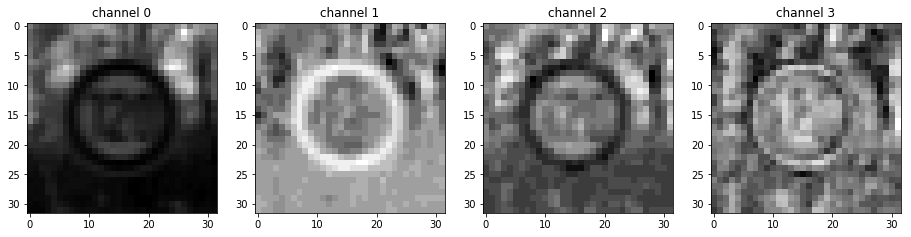

Slippery road, ID: 23


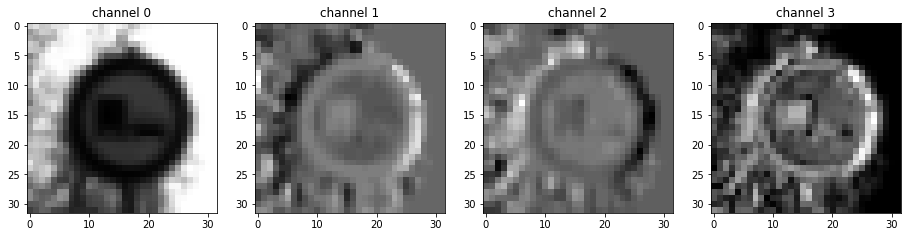

Speed limit (30km/h), ID: 1


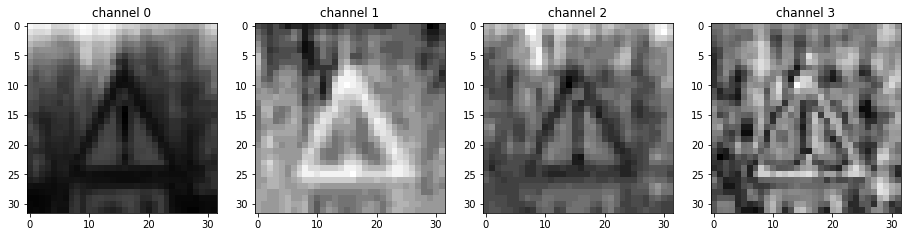

Speed limit (30km/h), ID: 1


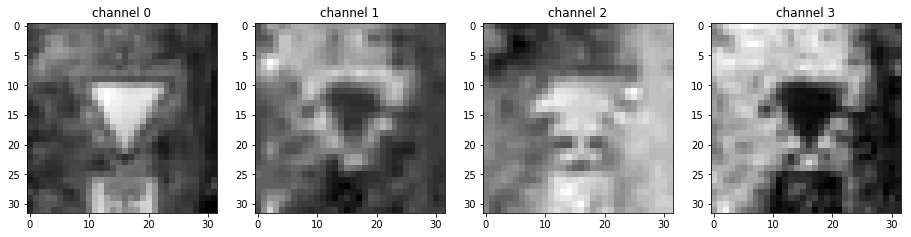

Speed limit (30km/h), ID: 1


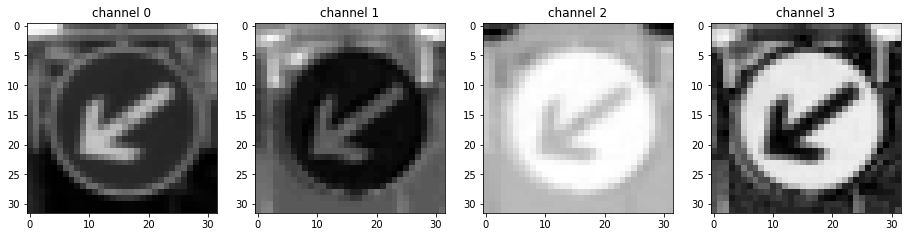

Speed limit (30km/h), ID: 1


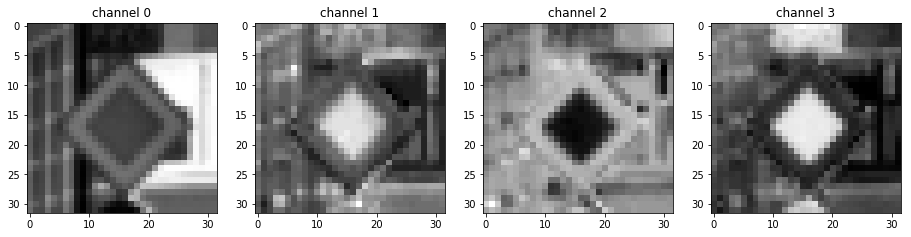

Speed limit (30km/h), ID: 1


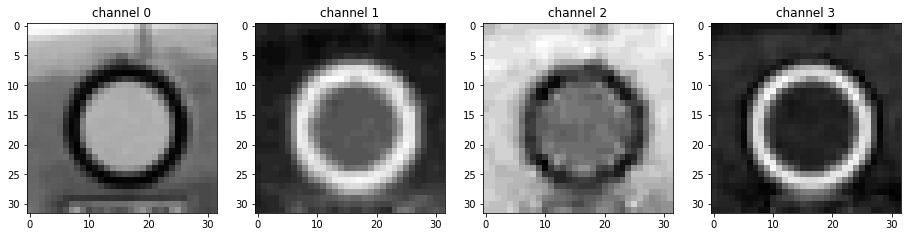

Speed limit (30km/h), ID: 1


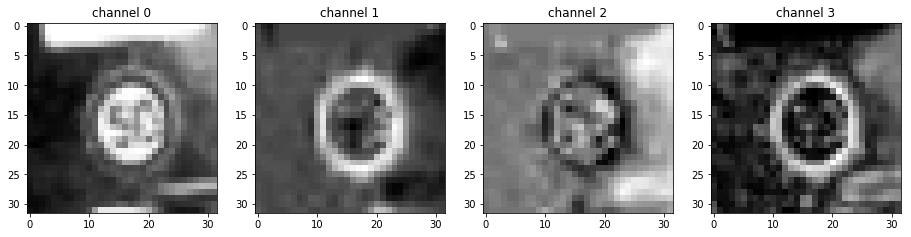

Speed limit (30km/h), ID: 1
Wall time: 28.1 s


In [8]:
def visualise_dataset(image,y_valid_org):
    plt_num = 1
    print(image.shape)
    
    for image_idx in range(0,image.shape[0],int(image.shape[0]/15)):
        channels = image.shape[3]
        plt.figure(plt_num, figsize=(32,32))
        for channel in range(channels):
            plt.subplot(4,8, channel+1) # sets the number of feature maps to show on each row and column
            plt.title('channel ' + str(channel)) # displays the feature map number
            plt.imshow(image[image_idx,:,:, channel], interpolation="nearest", cmap="gray")
        plt.show()

        sign_id = y_train_org[image_idx]
        sign_name = df.values[int(sign_id),-1]
        print('{1}, ID: {0}'.format(sign_id,sign_name))
        
%time visualise_dataset(X_valid[:,:,:,:],y_valid_org)       

In [9]:
if False:
    with open('X_train.pickle', 'rb') as handle:
        X_train = pickle.load(handle, protocol=pickle.HIGHEST_PROTOCOL)
    with open('X_valid.pickle', 'rb') as handle:
        X_valid = pickle.load(handle, protocol=pickle.HIGHEST_PROTOCOL)
    with open('X_test.pickle', 'rb') as handle:
        X_test = pickle.load(handle, protocol=pickle.HIGHEST_PROTOCOL)
        
if False:
    with open('X_train.pickle', 'wb') as handle:
        pickle.dump(X_train, handle, protocol=pickle.HIGHEST_PROTOCOL)
    with open('X_valid.pickle', 'wb') as handle:
        pickle.dump(X_valid, handle, protocol=pickle.HIGHEST_PROTOCOL)
    with open('X_test.pickle', 'wb') as handle:
        pickle.dump(X_test, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [10]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
print(X_train[0,0,0,:])

(34799, 32, 32, 4)
(4410, 32, 32, 4)
(12630, 32, 32, 4)
[ 0.10196078  0.50588235  0.49803922  0.14117647]


### Model Architecture

In [ ]:
import tensorflow as tf

def conv2d(x_tensor, conv_num_outputs, conv_ksize, conv_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """    
    
    # Create the weight and bias
    biases  = tf.Variable(tf.zeros(conv_num_outputs))
    # TF 1.0 :
    #weights_depth = x_tensor.shape.as_list()[-1]
    # TF 0.12 :
    weights_depth = x_tensor.get_shape().as_list()[-1]
    weights_dim = [conv_ksize[0], conv_ksize[1], weights_depth, conv_num_outputs]
    weights = tf.Variable(tf.truncated_normal(weights_dim))
    
    # Apply Convolution
    conv_strides = [1, conv_strides[0], conv_strides[1], 1] # (batch, height, width, depth)
    padding = 'VALID'
    conv_layer = tf.nn.conv2d(x_tensor, weights, conv_strides, padding)

    # Add bias
    conv_layer = tf.nn.bias_add(conv_layer, biases)
    
    # Apply activation function
    conv_layer = tf.nn.relu(conv_layer)
    
    return conv_layer 

    
def pool(conv_layer, pool_ksize, pool_strides):

    filter_shape = [1, pool_ksize[0], pool_ksize[1], 1]
    pool_strides = [1, pool_strides[0], pool_strides[1], 1]
    padding = 'VALID'
    
    pool_max = tf.nn.max_pool(conv_layer, filter_shape, pool_strides, padding)
    #pool_avg = tf.nn.avg_pool(conv_layer, filter_shape, pool_strides, padding)
    
    #pool_max = tf.nn.fractional_max_pool(conv_layer,  [1.0, 2.0, 2.0, 1.0])
    #pool_avg = tf.nn.fractional_avg_pool(conv_layer,  [1.0, 2.0, 2.0, 1.0])
    
    #pool = tf.concat(3,[pool_max,pool_avg])

    return pool_max 


def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    dimensions = (x_tensor.get_shape().as_list()[1:4])
    
    prod = 1
    for dimension in dimensions:
        prod *= dimension
    
    x_tensor = tf.reshape(x_tensor, [-1,prod])
    return x_tensor


def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    tensor_out = tf.contrib.layers.fully_connected(x_tensor, num_outputs)
    return tensor_out


def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    
    x_tensor = x         #:param x_tensor: TensorFlow Tensor
    conv_strides = (1,1) #:param conv_strides: Stride 2-D Tuple for convolution
    pool_ksize = (2,2)   #:param pool_ksize: kernal size 2-D Tuple for pool
    pool_strides = (1,1) #:param pool_strides: Stride 2-D Tuple for pool
    conv_ksize = (3,3)
    
    conv_num_outputs = 5 #:param conv_num_outputs: Number of outputs for the convolutional layer   
    x_tensor = conv2d(x_tensor, conv_num_outputs, conv_ksize, conv_strides)
    conv_num_outputs = 7 #:param conv_num_outputs: Number of outputs for the convolutional layer   
    x_tensor = conv2d(x_tensor, conv_num_outputs, conv_ksize, conv_strides)
    #x_tensor = pool(x_tensor, pool_ksize, pool_strides)

    #conv_num_outputs = 17 #:param conv_num_outputs: Number of outputs for the convolutional layer   
    #x_tensor = conv2d(x_tensor, conv_num_outputs, conv_ksize, conv_strides)
    #x_tensor = conv2d(x_tensor, conv_num_outputs, conv_ksize, conv_strides)
    #x_tensor = pool(x_tensor, pool_ksize, pool_strides)
    

    return x_tensor

    
def fully_con_net(x_tensor, keep_prob):

    x_tensor = flatten(x_tensor)

    num_outputs = n_classes*4
    x_tensor = fully_conn(x_tensor, int(num_outputs))
    x_tensor = tf.nn.dropout(x_tensor, keep_prob)
    num_outputs = n_classes*3
    x_tensor = fully_conn(x_tensor, int(num_outputs))
    x_tensor = tf.nn.dropout(x_tensor, keep_prob)
    num_outputs = n_classes*2
    x_tensor = tf.nn.dropout(x_tensor, keep_prob)
    x_tensor = fully_conn(x_tensor, int(num_outputs))
    num_outputs = n_classes
    x_tensor = fully_conn(x_tensor, int(num_outputs))
    
    return x_tensor


##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
image_shape = X_train.shape[1:]

x = tf.placeholder(tf.float32, shape=[None, image_shape[0], image_shape[1], image_shape[2]],name = 'x')
y = tf.placeholder(tf.float32, shape=[None, n_classes],name = 'y')
keep_prob = tf.placeholder(tf.float32, name='keep_prob')

# Model

x_pre = x#tf.nn.dropout(x, keep_prob) #:param x_tensor: TensorFlow Tensor
x_pre = tf.nn.local_response_normalization(x_pre)


# conv + pool
conv_ksize = (3,3)
conv_strides = (1,1) #:param conv_strides: Stride 2-D Tuple for convolution
pool_ksize = (2,2)   #:param pool_ksize: kernal size 2-D Tuple for pool
pool_strides = (1,1) #:param pool_strides: Stride 2-D Tuple for pool

conv_num_outputs = 7 #:param conv_num_outputs: Number of outputs for the convolutional layer   
c00 = conv2d(x_pre, conv_num_outputs, conv_ksize, conv_strides)
conv_num_outputs = 5 #:param conv_num_outputs: Number of outputs for the convolutional layer   
c01 = conv2d(c00, conv_num_outputs, conv_ksize, conv_strides)
p0  = pool(c01, pool_ksize, pool_strides)

conv_num_outputs = 9 #:param conv_num_outputs: Number of outputs for the convolutional layer   
c10 = conv2d(x_pre, conv_num_outputs, conv_ksize, conv_strides)
conv_num_outputs = 7 #:param conv_num_outputs: Number of outputs for the convolutional layer   
c11 = conv2d(c00, conv_num_outputs, conv_ksize, conv_strides)
p1  = pool(c01, pool_ksize, pool_strides)

tf_activation = p1

# pick layers
p1f = flatten(p1)
p0f = flatten(p0)
#c00f = flatten(c00)
#c11f = flatten(c11)

concat = tf.concat(1,[p1f,p0f])
#concat = tf.concat(1,[concat,c00f])
#concat = tf.concat(1,[concat,c11f])

# fully connected layers
num_outputs = n_classes*4
x_tensor = fully_conn(concat, int(num_outputs))
x_tensor = tf.nn.dropout(x_tensor, keep_prob)
#num_outputs = n_classes*3
#x_tensor = fully_conn(x_tensor, int(num_outputs))
#x_tensor = tf.nn.dropout(x_tensor, keep_prob)
#num_outputs = n_classes*2
#x_tensor = tf.nn.dropout(x_tensor, keep_prob)
#x_tensor = fully_conn(x_tensor, int(num_outputs))
num_outputs = n_classes
x_tensor = fully_conn(x_tensor, int(num_outputs))
    
logits            = fully_con_net(x_tensor, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)
#optimizer = tf.train.RMSPropOptimizer(0.001).minimize(cost)


# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')



### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [ ]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    
    #x = neural_net_image_input((32, 32, 3))
    #y = neural_net_label_input(10)
    #keep_prob = neural_net_keep_prob_input()
    
    #print(label_batch)
    config=tf.ConfigProto(#allow_soft_placement=True,
                          #log_device_placement=True,
                         # device_count = {'GPU': 8}
         )
    sess = tf.Session(config=config)
    
    feed_dict={keep_prob:keep_probability,x:feature_batch,y:label_batch}
    
    #print(feed_dict)

    session.run(optimizer,feed_dict=feed_dict)
    
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """   
    feed_dict={keep_prob:1.,x:feature_batch,y:label_batch}
    
    # Should this be done on validation data?
    # Calculate batch loss and accuracy
    loss = session.run(cost,feed_dict=feed_dict)
    valid_acc = sess.run(accuracy,feed_dict=feed_dict)
    #print('Loss: {0:9.5f} Accuracy: {1:9.5f}'.format(loss,valid_acc))
    return loss, valid_acc
    
def get_next_batch(batches, batch_size = 64):
    n_batches = len(batches)//batch_size
    for idx in range(0,n_batches,batch_size):
        batch = batches[idx:idx+batch_size,:,:,:]
        yield [x,y]
       
# Parameters
epochs = 100  # 1000 @ 128 => 3430 sec / ~1h
batch_size = 1000
keep_probability = 0.7

saved_acc = .0
save_model_path = './'

saver = tf.train.Saver()

import time
start = time.time()
print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    try:
        saver.restore(sess, save_model_path)
        print('Restored Model.')
    except:
        sess.run(tf.global_variables_initializer())
        print('Initialised Model...')
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches 
        for idx in range(0,len(X_train),batch_size):
            n_batches = len(X_train)//batch_size
            batch_idx =  ((np.random.random(batch_size)*X_train.shape[0])).astype(int)
            batch_features = X_train[batch_idx,:,:,:]
            batch_labels   = y_train[batch_idx]
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            
            if idx % 5 == 0:
                loss, acc = print_stats(sess, batch_features, batch_labels, cost, accuracy)
                loss_valid, acc_valid = print_stats(sess, X_valid, y_valid, cost, accuracy)
                print('Epoch {:>4}, Batch {:>6}: Loss: {:9.5f} Accuracy: {:9.5f} Validation: Loss: {:9.5f} Accuracy: {:9.5f}'.format(
                    epoch + 1, idx,loss,acc,loss_valid, acc_valid))
                
            if acc_valid > saved_acc:
                try:
                    save_path = saver.save(sess, save_model_path)
                    saved_acc = acc_valid
                    print('Model saved')
                except:
                    print('Model saving failed')

        #if acc_valid > 0.95:
        #   break
    
print('Training time : {}'.format(time.time() - start))


Training...
Initialised Model...
Epoch    1, Batch      0: Loss:   3.76576 Accuracy:   0.02900 Validation: Loss:   3.77631 Accuracy:   0.02834
Model saved
Epoch    1, Batch   1000: Loss:   3.74226 Accuracy:   0.03900 Validation: Loss:   3.74457 Accuracy:   0.05306
Model saved
Epoch    1, Batch   2000: Loss:   3.73709 Accuracy:   0.07600 Validation: Loss:   3.73558 Accuracy:   0.08594
Model saved
Epoch    1, Batch   3000: Loss:   3.71104 Accuracy:   0.11900 Validation: Loss:   3.71825 Accuracy:   0.10816
Model saved
Epoch    1, Batch   4000: Loss:   3.67592 Accuracy:   0.08700 Validation: Loss:   3.68674 Accuracy:   0.07937
Epoch    1, Batch   5000: Loss:   3.61241 Accuracy:   0.06300 Validation: Loss:   3.64732 Accuracy:   0.06372
Epoch    1, Batch   6000: Loss:   3.60024 Accuracy:   0.07500 Validation: Loss:   3.62257 Accuracy:   0.07211
Epoch    1, Batch   7000: Loss:   3.59415 Accuracy:   0.10000 Validation: Loss:   3.60898 Accuracy:   0.09093
Epoch    1, Batch   8000: Loss:   3.588

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
visualise_dataset(X_test[:,:,:,3:6],y_test)       

### Predict the Sign Type for Each Image

In [ ]:
save_model_path = './'
n_samples = 12
top_n_predictions = 5

import random
import pandas as pd
from sklearn.preprocessing import LabelBinarizer

def _load_label_names():
    """
    Load the label names from file
    """
    df = pd.read_csv('./signnames.csv')
    return df['SignName'].values

def display_image_predictions(features, labels, predictions,n_samples,top_n_predictions):
    n_classes = 43
    label_names = _load_label_names()
    label_binarizer = LabelBinarizer()
    label_binarizer.fit(range(n_classes))
    label_ids = label_binarizer.inverse_transform(np.array(labels))

    fig, axies = plt.subplots(nrows=n_samples, ncols=2)
    #fig.tight_layout()
    #fig.suptitle('Softmax Predictions', fontsize=20, y=1.1)
    fig.suptitle('Softmax Predictions', fontsize=44)
    fig.set_size_inches(22, n_samples*2)
    
    n_predictions = top_n_predictions  ### Check this later, computer is busy
    margin = 0.05
    ind = np.arange(n_predictions)
    width = (1. - 2. * margin) / n_predictions

    for image_i, (feature, label_id, pred_indicies, pred_values) in enumerate(zip(features, label_ids, predictions.indices, predictions.values)):
        pred_names = [label_names[pred_i] for pred_i in pred_indicies]
        correct_name = label_names[label_id]
        
        axies[image_i][0].imshow(feature[:,:,3:6])
        axies[image_i][0].set_title(correct_name)
        axies[image_i][0].set_axis_off()

        axies[image_i][1].barh(ind + margin, pred_values[::-1], width)
        axies[image_i][1].set_yticks(ind + margin)
        axies[image_i][1].set_yticklabels(pred_names[::-1])
        axies[image_i][1].set_xticks([0, 0.5, 1.0])
        

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = X_test, y_test

    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        #for train_feature_batch, train_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
        n_batches = len(X_test)//batch_size
        for idx in range(0,n_batches,batch_size):
            train_feature_batch = X_test[idx:idx+batch_size,:,:,:]
            train_label_batch   = y_test[idx:idx+batch_size]
            
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: train_feature_batch, loaded_y: train_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        display_image_predictions(random_test_features, random_test_labels, random_test_predictions,n_samples,top_n_predictions)


test_model()

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input,keep_prob:1})
    print(activation.shape)
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
            
            
image =  X_train[-1:,:,:,:]
fig, ax = plt.subplots()
ax.imshow(image[0,:,:,:])
plt.show()


with tf.Session() as sess:
    # Initializing the variables
    try:
        saver.restore(sess, save_model_path)
        print('Restored Model...')
    except:
        sess.run(tf.global_variables_initializer())
        print('Initialised Model...')
    outputFeatureMap(image, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1)

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

In [ ]:
##Writeup Template

**Build a Traffic Sign Recognition Project**

The goals / steps of this project are the following:
* Load the data set (see below for links to the project data set)
* Explore, summarize and visualize the data set
* Design, train and test a model architecture
* Use the model to make predictions on new images
* Analyze the softmax probabilities of the new images
* Summarize the results with a written report


[//]: # (Image References)

[image1]: ./examples/visualization.jpg "Visualization"
[image2]: ./examples/grayscale.jpg "Grayscaling"
[image3]: ./examples/random_noise.jpg "Random Noise"
[image4]: ./examples/placeholder.png "Traffic Sign 1"
[image5]: ./examples/placeholder.png "Traffic Sign 2"
[image6]: ./examples/placeholder.png "Traffic Sign 3"
[image7]: ./examples/placeholder.png "Traffic Sign 4"
[image8]: ./examples/placeholder.png "Traffic Sign 5"

## Rubric Points


###Data Set Summary & Exploration

####1. Provide a basic summary of the data set and identify where in your code the summary was done. In the code, the analysis should be done using python, numpy and/or pandas methods rather than hardcoding results manually.

The code for this step is contained in the second code cell of the IPython notebook.  

I used the pandas library to load the signnames

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


####2. Include an exploratory visualization of the dataset and identify where the code is in your code file.

I just plottet the images, ids and sign names. I know this signs very well so i could also verify that the labels are correct.

###Design and Test a Model Architecture

- I added a HLS colorspace to the data. 
- Did max-scaling
- I used 3 Layers conv2d_maxpool and 3 fully connected Layers
- The model did learn very fast so there was no need for normalization.

####2. Training, validation and testing data. How much data was in each set? 

There was a lot of data, it seems it comes from videosequences moving mostly towards the signs.

I jused random batches to get rid of the sorting in the frames.

The code for splitting the data into training and validation sets is contained in the fifth code cell of the IPython notebook.  

To cross validate my model, I randomly split the training data into a training set and validation set. I did this by ...

My final training set had X number of images. My validation set and test set had Y and Z number of images.

The sixth code cell of the IPython notebook contains the code for augmenting the data set. I decided to generate additional data because ... To add more data to the the data set, I used the following techniques because ... 

Here is an example of an original image and an augmented image:

![alt text][image3]

The difference between the original data set and the augmented data set is the following ... 


####3. Describe, and identify where in your code, what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc.) Consider including a diagram and/or table describing the final model.

The code for my final model is located in the seventh cell of the ipython notebook. 

My final model consisted of the following layers:

| Layer         		|     Description	        					| 
|:---------------------:|:---------------------------------------------:| 
| Input         		| 32x32x3 RGB image   							| 
| Convolution 3x3     	| 1x1 stride, same padding, outputs 32x32x64 	|
| RELU					|												|
| Max pooling	      	| 2x2 stride,  outputs 16x16x64 				|
| Convolution 3x3	    | etc.      									|
| Fully connected		| etc.        									|
| Softmax				| etc.        									|
|						|												|
|						|												|
 


####4. Describe how, and identify where in your code, you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and any hyperparameters such as learning rate.

The code for training the model is located in the eigth cell of the ipython notebook. 

To train the model, I used an ....

####5. Describe the approach taken for finding a solution. Include in the discussion the results on the training, validation and test sets and where in the code these were calculated. Your approach may have been an iterative process, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think the architecture is suitable for the current problem.

The code for calculating the accuracy of the model is located in the ninth cell of the Ipython notebook.

My final model results were:
* training set accuracy of ?
* validation set accuracy of ? 
* test set accuracy of ?

If an iterative approach was chosen:
* What was the first architecture that was tried and why was it chosen?
* What were some problems with the initial architecture?
* How was the architecture adjusted and why was it adjusted? Typical adjustments could include choosing a different model architecture, adding or taking away layers (pooling, dropout, convolution, etc), using an activation function or changing the activation function. One common justification for adjusting an architecture would be due to over fitting or under fitting. A high accuracy on the training set but low accuracy on the validation set indicates over fitting; a low accuracy on both sets indicates under fitting.
* Which parameters were tuned? How were they adjusted and why?
* What are some of the important design choices and why were they chosen? For example, why might a convolution layer work well with this problem? How might a dropout layer help with creating a successful model?

If a well known architecture was chosen:
* What architecture was chosen?
* Why did you believe it would be relevant to the traffic sign application?
* How does the final model's accuracy on the training, validation and test set provide evidence that the model is working well?
 

###Test a Model on New Images

####1. Choose five German traffic signs found on the web and provide them in the report. For each image, discuss what quality or qualities might be difficult to classify.

Here are five German traffic signs that I found on the web:

![alt text][image4] ![alt text][image5] ![alt text][image6] 
![alt text][image7] ![alt text][image8]

The first image might be difficult to classify because ...

####2. Discuss the model's predictions on these new traffic signs and compare the results to predicting on the test set. Identify where in your code predictions were made. At a minimum, discuss what the predictions were, the accuracy on these new predictions, and compare the accuracy to the accuracy on the test set (OPTIONAL: Discuss the results in more detail as described in the "Stand Out Suggestions" part of the rubric).

The code for making predictions on my final model is located in the tenth cell of the Ipython notebook.

Here are the results of the prediction:

| Image			        |     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| Stop Sign      		| Stop sign   									| 
| U-turn     			| U-turn 										|
| Yield					| Yield											|
| 100 km/h	      		| Bumpy Road					 				|
| Slippery Road			| Slippery Road      							|


The model was able to correctly guess 4 of the 5 traffic signs, which gives an accuracy of 80%. This compares favorably to the accuracy on the test set of ...

####3. Describe how certain the model is when predicting on each of the five new images by looking at the softmax probabilities for each prediction and identify where in your code softmax probabilities were outputted. Provide the top 5 softmax probabilities for each image along with the sign type of each probability. (OPTIONAL: as described in the "Stand Out Suggestions" part of the rubric, visualizations can also be provided such as bar charts)

The code for making predictions on my final model is located in the 11th cell of the Ipython notebook.

For the first image, the model is relatively sure that this is a stop sign (probability of 0.6), and the image does contain a stop sign. The top five soft max probabilities were

| Probability         	|     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| .60         			| Stop sign   									| 
| .20     				| U-turn 										|
| .05					| Yield											|
| .04	      			| Bumpy Road					 				|
| .01				    | Slippery Road      							|


For the second image ... 